In [1]:
from pennylane import numpy as np
import pennylane as qml
from pennylane import qchem
from matplotlib import pyplot as plt
from functions_vqe_cnot import vqe_uccsd
from functions_vqe_cnot import vqe_ng as vqe_ng_old
from functions_vqe_th import vqe_ng
from functions_vqe_crx import vqe_ng as vqe_ng_crx
import torch as th

device = 'cpu'

## He<sub>2</sub> hamiltonian definition 

In [2]:
dataset = qml.data.load('qchem', molname="He2")[0]
H, qubits = dataset.hamiltonian, len(dataset.hamiltonian.wires)
print("Number of qubits = ", qubits)
print("The Hamiltonian is ", H)

Number of qubits =  8
The Hamiltonian is  -1.6743100655776797 * I([0, 1, 2, 3, 4, 5, 6, 7]) + 0.3416412951109973 * Z(0) + 0.01523407338776362 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Y(4)) + 0.01523407338776362 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ X(4)) + 0.3416408311620236 * Z(2) + 0.025441159889832372 * (Z(0) @ Z(2)) + 0.015234388911867857 * (Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + 0.015234388911867857 * (X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + 7.317214998671384e-08 * (Z(0) @ Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6)) + 7.317214998671384e-08 * (Z(0) @ X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6)) + -0.5193693204313432 * Z(4) + 0.09152839641299164 * (Z(0) @ Z(4)) + -0.5193733761290926 * Z(6) + 0.0915284611478574 * (Z(0) @ Z(6)) + 0.34164129511099733 * Z(1) + 0.14108387203893755 * (Z(0) @ Z(1)) + 0.03956129782205163 * (Y(0) @ Z(2) @ Z(3) @ Y(4)) + 0.03956129782205163 * (X(0) @ Z(2) @ Z(3) @ X(4)) + 0.11564281616296 * (Y(0) @ X(1) @ X(2) @ Y(3)) + -0.11564281616296 * (Y(0) @ Y(1) @ X(2) @ X(3)) + -0.11564281616296 * (X(0) @ X(1) @

In [3]:
dev = qml.device("lightning.qubit", wires=qubits)

In [4]:
electrons = 4
hf_state = qml.qchem.hf_state(electrons, qubits)
singles, doubles = qchem.excitations(electrons, qubits)
print(hf_state)

[1 1 1 1 0 0 0 0]


In [5]:
s_wires, d_wires = qml.qchem.excitations_to_wires(singles, doubles)

In [6]:
max_iterations = 50
conv_tol = 1e-06

opt = qml.GradientDescentOptimizer(stepsize=0.1)

## UCC

In [7]:
opt = qml.AdamOptimizer(stepsize=0.1)

In [8]:
energy, _, grad_norms, grad_variances = vqe_uccsd(H, qubits, hf_state, singles, doubles, opt=opt)

  0%|          | 0/100 [00:00<?, ?it/s]

It=0, E=-5.73216039 Ha, 


/home/christian/miniconda3/envs/env_quant/lib/python3.11/site-packages/pennylane/_grad.py:310: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


IndexError: tuple index out of range

In [ ]:
exact_energy = dataset.fci_energy
print("\n--- VQE Calculation Complete ---")
print(f"Final VQE ground state energy: {energy[-1]:.8f} Ha")
print(f"Exact FCI energy (for comparison): {exact_energy:.8f} Ha")
print(f"Error from exact value: {abs(energy[-1] - exact_energy):.8f} Ha")
print("---------------------------------")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Energy
ax1.plot(energy, 'b', label='Energy')
ax1.axhline(y=exact_energy, color='red', linestyle='--', label='Exact FCI Energy')
ax1.set_ylabel("Energy (Ha)")
ax1.legend()
ax1.grid()

# Plot Gradient Norm and Variance
ax2.plot(grad_norms, 'r', label='Gradient Norm |∇E|')
ax2.plot(grad_variances, 'g--', label='Gradient Variance Var(∇E)')
ax2.set_ylabel("Gradient Metric Value")
ax2.set_xlabel("Optimization Step")
ax2.set_yscale('log') # Log scale is crucial for seeing the vanishing values
ax2.legend()
ax2.grid()

plt.style.use("seaborn-v0_8-darkgrid")
ax1.grid(True)
ax2.grid(True)
plt.show()


--- VQE Calculation Complete ---


NameError: name 'energy' is not defined

## Hardware efficient ansatz

In [7]:
energy, grad_norm, grad_var, conv = vqe_ng_crx(H, qubits, 8, 0.01, 0.001, max_iterations=1000, conv_tol=1e-06, verbose=False)

In [8]:
energy[:-20]

[-1.813559889793396,
 -1.813559889793396,
 -2.072042226791382,
 -2.326751470565796,
 -2.576763153076172,
 -2.825709819793701,
 -3.0776314735412598,
 -3.331869602203369,
 -3.5844788551330566,
 -3.830777406692505,
 -4.066290855407715,
 -4.2870774269104,
 -4.489999771118164,
 -4.673028469085693,
 -4.8354692459106445,
 -4.977836608886719,
 -5.101395130157471,
 -5.20761251449585,
 -5.297678470611572,
 -5.372345924377441,
 -5.43217134475708,
 -5.477933406829834,
 -5.510992527008057,
 -5.533472061157227,
 -5.5481648445129395,
 -5.5580949783325195,
 -5.565888404846191,
 -5.573287487030029,
 -5.581058502197266,
 -5.589223861694336,
 -5.597431659698486,
 -5.605268478393555,
 -5.612456321716309,
 -5.618908405303955,
 -5.624693393707275,
 -5.629965782165527,
 -5.634895324707031,
 -5.639623641967773,
 -5.644242763519287,
 -5.648796081542969,
 -5.6532883644104,
 -5.657704830169678,
 -5.662021160125732,
 -5.666207313537598,
 -5.670227527618408,
 -5.674047946929932,
 -5.677650451660156,
 -5.6810436248

In [25]:
vqe_ng_old(H, qubits, 20, opt, max_iterations=max_iterations, conv_tol=1e-06, verbose=False)
    

([array(-0.83748564),
  array(-2.53544316),
  array(-4.44420789),
  array(-5.2402939),
  array(-5.44926718),
  array(-5.50393483),
  array(-5.53083471),
  array(-5.54925363),
  array(-5.56408661),
  array(-5.57663196),
  array(-5.58742177),
  array(-5.59682255),
  array(-5.60508966),
  array(-5.61244314),
  array(-5.61903476),
  array(-5.62499723),
  array(-5.63042052),
  array(-5.63538452),
  array(-5.63994416),
  array(-5.64414928),
  array(-5.64803563),
  array(-5.65163621),
  array(-5.65497618),
  array(-5.65807898),
  array(-5.6609636),
  array(-5.66364781),
  array(-5.66614672),
  array(-5.66847448),
  array(-5.67064356),
  array(-5.67266561),
  array(-5.67455115),
  array(-5.67630999),
  array(-5.67795107),
  array(-5.67948276),
  array(-5.68091275),
  array(-5.6822482),
  array(-5.68349575),
  array(-5.68466155),
  array(-5.68575133),
  array(-5.68677041),
  array(-5.68772372),
  array(-5.68861585),
  array(-5.68945106),
  array(-5.69023331),
  array(-5.69096628),
  array(-5.69

In [ ]:
energy, _, grad_norms, grad_variances = vqe_hee(H, qubits, L=4, opt=opt, max_iterations=500, conv_tol=1e-06)

  0%|          | 0/500 [00:00<?, ?it/s]

It=0, E=-2.02422413 Ha, |∇E|=0.648229, Var(∇E)=0.004336
It=10, E=-4.07084015 Ha, |∇E|=0.957057, Var(∇E)=0.009466
It=20, E=-5.48092808 Ha, |∇E|=0.965406, Var(∇E)=0.009703
It=30, E=-5.62191928 Ha, |∇E|=0.470428, Var(∇E)=0.002179
It=40, E=-5.67039141 Ha, |∇E|=0.370655, Var(∇E)=0.001430
It=50, E=-5.69658482 Ha, |∇E|=0.232017, Var(∇E)=0.000561
It=60, E=-5.70637963 Ha, |∇E|=0.135254, Var(∇E)=0.000190
It=70, E=-5.70937212 Ha, |∇E|=0.087405, Var(∇E)=0.000077
It=80, E=-5.71024991 Ha, |∇E|=0.053096, Var(∇E)=0.000029
It=90, E=-5.71087914 Ha, |∇E|=0.030950, Var(∇E)=0.000010
It=100, E=-5.71124730 Ha, |∇E|=0.017220, Var(∇E)=0.000003
It=110, E=-5.71160699 Ha, |∇E|=0.012578, Var(∇E)=0.000002
It=120, E=-5.71205762 Ha, |∇E|=0.008946, Var(∇E)=0.000001
It=130, E=-5.71259766 Ha, |∇E|=0.006972, Var(∇E)=0.000000
It=140, E=-5.70857055 Ha, |∇E|=0.231015, Var(∇E)=0.000535
It=150, E=-5.71137324 Ha, |∇E|=0.138594, Var(∇E)=0.000200
It=160, E=-5.71380722 Ha, |∇E|=0.148246, Var(∇E)=0.000225
It=170, E=-5.71452975 Ha,


--- VQE Calculation Complete ---
Final VQE ground state energy: -5.73004504 Ha
Exact FCI energy (for comparison): -5.74032428 Ha
Error from exact value: 0.01027924 Ha
---------------------------------


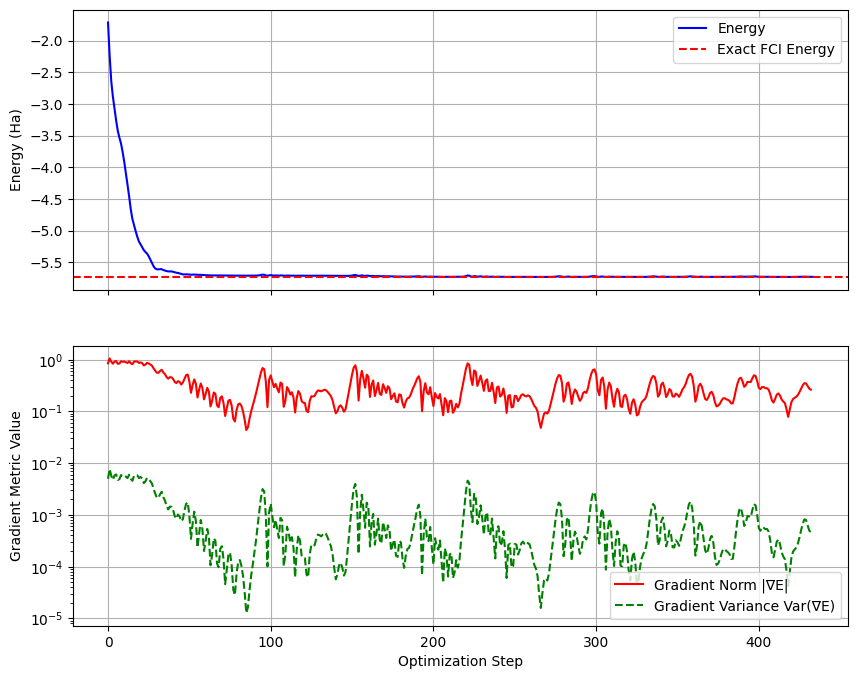

In [9]:
exact_energy = dataset.fci_energy
print("\n--- VQE Calculation Complete ---")
print(f"Final VQE ground state energy: {energy[-1]:.8f} Ha")
print(f"Exact FCI energy (for comparison): {exact_energy:.8f} Ha")
print(f"Error from exact value: {abs(energy[-1] - exact_energy):.8f} Ha")
print("---------------------------------")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Energy
ax1.plot(energy, 'b', label='Energy')
ax1.axhline(y=exact_energy, color='red', linestyle='--', label='Exact FCI Energy')
ax1.set_ylabel("Energy (Ha)")
ax1.legend()
ax1.grid()

# Plot Gradient Norm and Variance
ax2.plot(grad_norms, 'r', label='Gradient Norm |∇E|')
ax2.plot(grad_variances, 'g--', label='Gradient Variance Var(∇E)')
ax2.set_ylabel("Gradient Metric Value")
ax2.set_xlabel("Optimization Step")
ax2.set_yscale('log') # Log scale is crucial for seeing the vanishing values
ax2.legend()
ax2.grid()

plt.style.use("seaborn-v0_8-darkgrid")
ax1.grid(True)
ax2.grid(True)
plt.show()

## QResNet

In [10]:
H_th = th.tensor(H.matrix(), device=device)

In [14]:
module = VQEModule(H_th, L=5, device='cpu')
opt = th.optim.Adam(module.parameters(), lr=0.1)
energy, grad_norms, grad_vars = optimize_vqe(module, opt, steps=300)

torch.Size([5, 7])


  0%|          | 0/300 [00:00<?, ?it/s]


--- VQE Calculation Complete ---
Final VQE ground state energy: -5.71272657 Ha
Exact FCI energy (for comparison): -5.74032428 Ha
Error from exact value: 0.02759770 Ha
---------------------------------


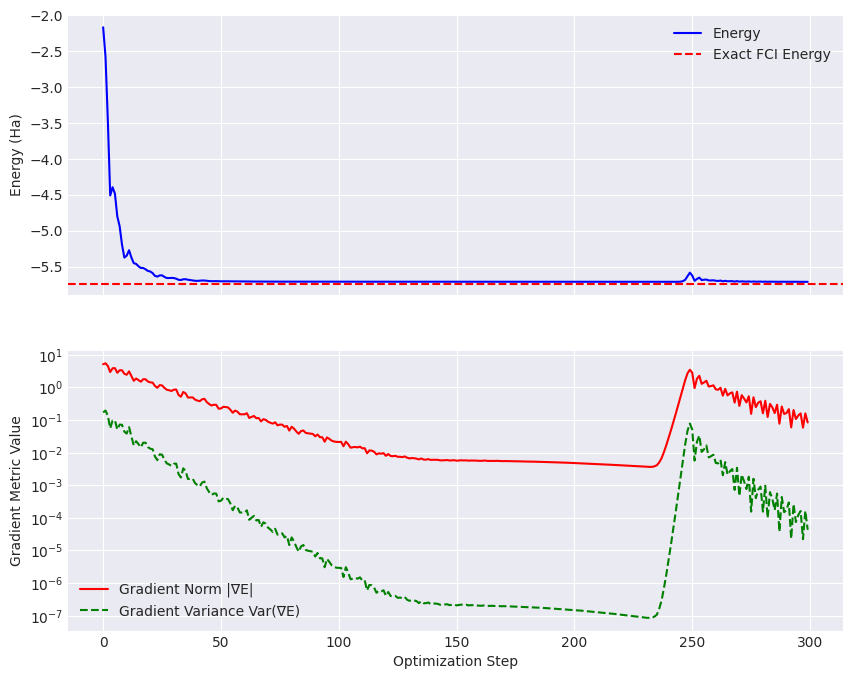

In [15]:
exact_energy = dataset.fci_energy
print("\n--- VQE Calculation Complete ---")
print(f"Final VQE ground state energy: {energy[-1]:.8f} Ha")
print(f"Exact FCI energy (for comparison): {exact_energy:.8f} Ha")
print(f"Error from exact value: {abs(energy[-1] - exact_energy):.8f} Ha")
print("---------------------------------")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Energy
ax1.plot(energy, 'b', label='Energy')
ax1.axhline(y=exact_energy, color='red', linestyle='--', label='Exact FCI Energy')
ax1.set_ylabel("Energy (Ha)")
ax1.legend()
ax1.grid()

# Plot Gradient Norm and Variance
ax2.plot(grad_norms, 'r', label='Gradient Norm |∇E|')
ax2.plot(grad_vars, 'g--', label='Gradient Variance Var(∇E)')
ax2.set_ylabel("Gradient Metric Value")
ax2.set_xlabel("Optimization Step")
ax2.set_yscale('log') # Log scale is crucial for seeing the vanishing values
ax2.legend()
ax2.grid()

plt.style.use("seaborn-v0_8-darkgrid")
ax1.grid(True)
ax2.grid(True)
plt.show()